# Predict Stock Market with Machine Learning
Tutorial by Dataquest [link](https://www.youtube.com/watch?v=1O_BenficgE)

In [45]:
import yfinance as yf

In [46]:
sp500 = yf.Ticker("^GSPC")
sp500 = sp500.history(period="max")
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-08-01 00:00:00-04:00,4578.830078,4584.620117,4567.529785,4576.729980,4042370000,0.0,0.0
2023-08-02 00:00:00-04:00,4550.930176,4550.930176,4505.750000,4513.390137,4270710000,0.0,0.0
2023-08-03 00:00:00-04:00,4494.270020,4519.490234,4485.540039,4501.890137,4149120000,0.0,0.0


Let's plot the index over time

<Axes: xlabel='Date'>

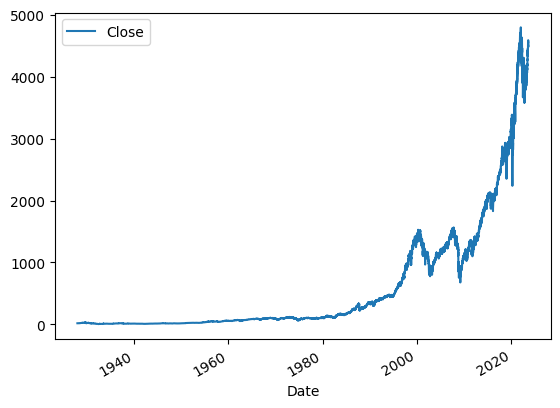

In [47]:
sp500.plot.line(y="Close", use_index=True)

We should remove the `Dividends` and `Stock Splits` columns

In [48]:
del sp500["Dividends"]
del sp500["Stock Splits"]

## Creating Machine Learning Targets

In [49]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [50]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-08-01 00:00:00-04:00,4578.830078,4584.620117,4567.529785,4576.729980,4042370000,4513.390137
2023-08-02 00:00:00-04:00,4550.930176,4550.930176,4505.750000,4513.390137,4270710000,4501.890137
2023-08-03 00:00:00-04:00,4494.270020,4519.490234,4485.540039,4501.890137,4149120000,4478.029785


In [51]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [52]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-08-01 00:00:00-04:00,4578.830078,4584.620117,4567.529785,4576.729980,4042370000,4513.390137,0
2023-08-02 00:00:00-04:00,4550.930176,4550.930176,4505.750000,4513.390137,4270710000,4501.890137,0
2023-08-03 00:00:00-04:00,4494.270020,4519.490234,4485.540039,4501.890137,4149120000,4478.029785,0


The time series is too long and is not useful. Let's remove information prior to 1990.\
**Note**:
`.copy()` help us avoid the copy error warning when trying to subset a dataframe, and then assign subset dataframe back to the original dataframe.

In [53]:
sp500 = sp500.loc["1990-01-01":].copy()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-08-01 00:00:00-04:00,4578.830078,4584.620117,4567.529785,4576.729980,4042370000,4513.390137,0
2023-08-02 00:00:00-04:00,4550.930176,4550.930176,4505.750000,4513.390137,4270710000,4501.890137,0
2023-08-03 00:00:00-04:00,4494.270020,4519.490234,4485.540039,4501.890137,4149120000,4478.029785,0


## Random Forest Classifer
Random Forest Classfier is a great default model to use. \
The model works by: \
Training a few decision trees using randomized parameters. Then average those results from the decision trees.\
**Benefits of Random Forest Classifer**: 
* Resistant to overfitting
* Run quickly
* Can pick up non-linear tendencies in the data 

In [54]:
from sklearn.ensemble import RandomForestClassifier

`n_estimators` is the number of individual decision trees we want to train.\
Higher value means the model will be more accurate.\
`min_sample_split` helps protect against over-fitting. \
Higher value makes the model less accurate, but less overfit.\
`randome_state` the randomness seed

In [55]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

## Prepare test data
We need to take into account that the data is a time-series dataset, and we cannot use `cross-validation` to test our model.
The biggest problem is that we want the model to predict future prices, and not have information about future prices built into the model. 

We will have the last 100 rows of data as our test set.

In [56]:
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

In [57]:
predictors = ["Close", "Volume", "Open", "High", "Low"]

In [58]:
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

## Back Testing

In [59]:
from sklearn.metrics import precision_score
preds = model.predict(test[predictors])
preds 

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [60]:
import pandas as pd
preds = pd.Series(preds, index=test.index)

In [61]:
precision_score(test["Target"], preds)

0.6071428571428571

<Axes: xlabel='Date'>

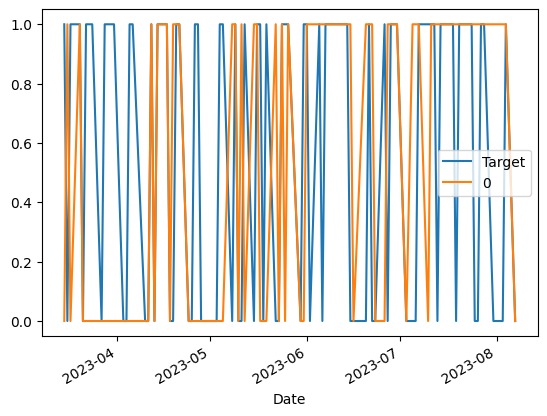

In [62]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

Let's make our back testing easier by making it into a function. 

In [63]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

def backtest(data, model, predictors, start=2500, step=250):
    # each year has about 250 trading days. 
    # we train the data on 10-year data, and predict the 11th year's outcome
    all_predictions = []
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)
    

In [64]:
predictions = backtest(sp500, model, predictors)

In [65]:
predictions["Predictions"].value_counts()

Predictions
0    3434
1    2530
Name: count, dtype: int64

In [66]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5300395256916997

**How does our model fare?**
Let's check the number of days the market actually went up in a year. 

In [67]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.534038
0    0.465962
Name: count, dtype: float64

**Conclusion:** This is terrible performance. We would have done better if we just bought the index and sold at the end of each day. 
The index went up 53.4% of the days, outperforming our model.

## Improve Our Model
We can improve our model by adding additional predictors. 


In [68]:
horizons = [2, 5, 60, 250, 1000]
new_predictors = []

for horizon in horizons: 
    rolling_averages = sp500.rolling(horizon).mean()
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    # calculates the sum of the days in the horizon, that the index went up

    new_predictors += [ratio_column, trend_column]

In [69]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01 00:00:00-04:00,4578.830078,4584.620117,4567.529785,4576.729980,4042370000,4513.390137,0,0.998666,1.0,1.001381,2.0,1.053060,36.0,1.127839,121.0,1.196973,536.0
2023-08-02 00:00:00-04:00,4550.930176,4550.930176,4505.750000,4513.390137,4270710000,4501.890137,0,0.993032,0.0,0.989834,2.0,1.036986,35.0,1.111837,120.0,1.179904,536.0
2023-08-03 00:00:00-04:00,4494.270020,4519.490234,4485.540039,4501.890137,4149120000,4478.029785,0,0.998724,0.0,0.988853,2.0,1.032905,34.0,1.108622,120.0,1.176413,535.0


In [70]:
sp500 = sp500.dropna()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-31 00:00:00-04:00,4584.819824,4594.220215,4573.140137,4588.959961,4503600000,4576.729980,0,1.000734,2.0,1.004465,3.0,1.057966,36.0,1.131394,121.0,1.200692,536.0
2023-08-01 00:00:00-04:00,4578.830078,4584.620117,4567.529785,4576.729980,4042370000,4513.390137,0,0.998666,1.0,1.001381,2.0,1.053060,36.0,1.127839,121.0,1.196973,536.0
2023-08-02 00:00:00-04:00,4550.930176,4550.930176,4505.750000,4513.390137,4270710000,4501.890137,0,0.993032,0.0,0.989834,2.0,1.036986,35.0,1.111837,120.0,1.179904,536.0


In [71]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [74]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    #instead of a 0 or 1 response, we return the probably if index will go up or not 
    preds[preds >= .6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [75]:
predictions = backtest(sp500, model, new_predictors)

In [76]:
predictions["Predictions"].value_counts()

Predictions
0.0    4144
1.0     819
Name: count, dtype: int64

New model makes less predictions on days where the stock market will go up. 
This is a good sign. Now let's put it to the test. 

In [77]:
precision_score(predictions["Target"], predictions["Predictions"])

0.568986568986569

**Conclusion:** Great, our model now outperforms just buying the stock everyday. 

## Future Improvements
Some possible improvements to the model: 
* We can add foreign market indexes as predictors 
* We can add in news and other macro indicators such as CPI, interest rate, etc
* Segregate key components of the SP500 such as key stocks, key industries as predictors
* We can play around with the time-span 